In [1]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.columns = [col.strip() for col in df.columns]
df.dropna(inplace = True)
df.reset_index(drop = True , inplace = True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
df = pd.get_dummies(df,columns=["Status","Country"])


In [11]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,0,0,0,0,0,0,0,0,1
1645,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,0,0,0,0,0,0,0,0,1
1646,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,0,0,0,0,0,0,0,0,1
1647,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df.shape

(1649, 155)

In [13]:
from sklearn.model_selection import train_test_split
y= df["Life expectancy"]
X=df.drop(["Life expectancy"],axis = 'columns')
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
Model = LinearRegression()
Model.fit(X_train , y_train)

LinearRegression()

In [18]:
y_pred = Model.predict(X_test)

print(f"R2 Score = {metrics.r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error = {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error = {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

R2 Score = 0.9454598203072441
Mean Absolute Error = 1.2243719846004875
Mean Squared Error = 4.3085965473396595
Root Mean Squared Error = 2.075715912002329


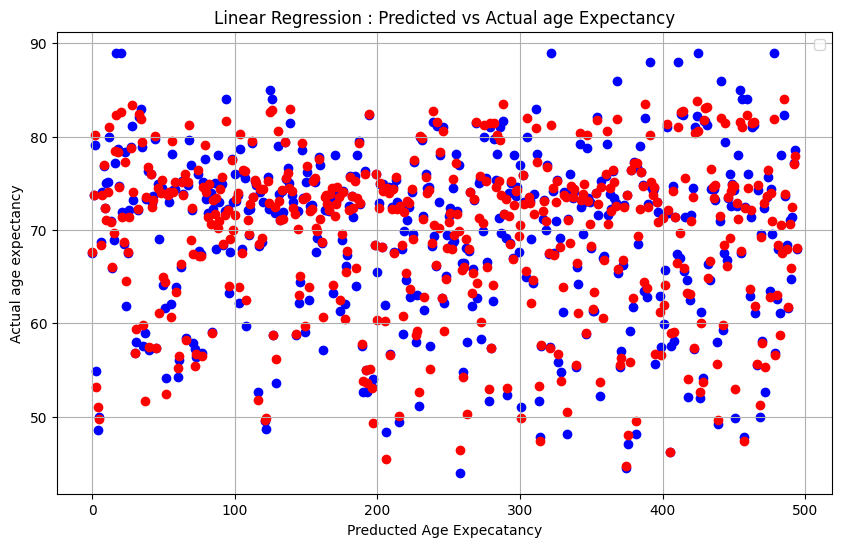

In [22]:
plt.figure(figsize =(10,6))
plt.scatter(range(len(y_test)),y_test,color = 'blue')
plt.scatter(range(len(y_pred)),y_pred,color = 'red')
plt.xlabel("Preducted Age Expecatancy")
plt.ylabel("Actual age expectancy")
plt.title("Linear Regression : Predicted vs Actual age Expectancy")
plt.legend()
plt.grid(True)
plt.show()